In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Imports dataframe after already removing outliers (done in "FilFinding_Data2.ipynb")
df = pd.read_csv('/Users/Daniel/Documents/Research Projects/Cosmic Filaments/FilsGalsProperties_stats.csv')
# removes that one last outlier 
df = df[(df['logmstar'] < 12)]
df

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
0,14472,0.11432,4,0.115302,10.5763,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1,14480,0.20018,4,0.201238,10.3639,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
2,14485,0.18342,5,0.184461,10.8563,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
3,14486,0.19952,4,0.200574,10.7926,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
4,14487,0.20088,4,0.201935,10.0827,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,746914,0.21139,4,0.212345,11.0295,0.091299,9.84517,0.144343,0.008360,0.005882,...,-0.192532,1.660380,307706.0,1.501970e+09,150197.0,NaN,NaN,NaN,NaN,NaN
9908,747326,0.18675,4,0.187759,11.4767,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
9909,748601,0.19344,4,0.194463,10.2161,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
9910,748610,0.12744,4,0.128396,10.5102,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN


<ErrorbarContainer object of 3 artists>

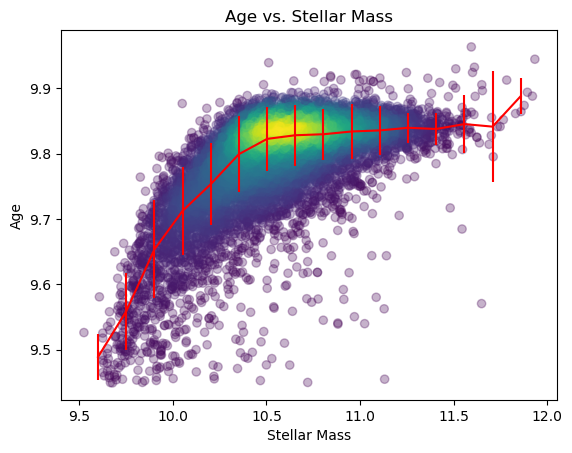

In [4]:
# try plotting this using MEDIAN 
x = df['logmstar'] 
y = df['logage']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

bin_medians, bin_edges, binnumber = stats.binned_statistic(x=x, values=y,statistic= 'median', bins = 16)
std, s_edges, s_binnumber = stats.binned_statistic(x=x, values = y, statistic = 'std', bins = 16)

plt.figure()   #(figsize =(8,6))

plt.scatter(x, y, c = z, alpha = 0.3)
plt.title("Age vs. Stellar Mass")
plt.ylabel('Age')
plt.xlabel('Stellar Mass')

# Errorbars 
errbars = (bin_edges[1:] + bin_edges[:-1])/2        # x position of median points
plt.errorbar(errbars ,bin_medians, yerr=std, fmt='r-')  # This plots median point x value, and median (which is y value)

In [3]:
print("bin_medians: ", bin_medians,"\n")    # y values 
print("bin_edges: ", bin_edges,"\n")        # x values 
# print("binnumber: ", binnumber) # we know already there are 16 bins 

bin_medians:  [9.48904  9.55876  9.65352  9.712445 9.75339  9.799235 9.82257  9.82813
 9.82968  9.8339   9.835515 9.83956  9.83772  9.84523  9.84131  9.88801 ] 

bin_edges:  [ 9.52438    9.6750125  9.825645   9.9762775 10.12691   10.2775425
 10.428175  10.5788075 10.72944   10.8800725 11.030705  11.1813375
 11.33197   11.4826025 11.633235  11.7838675 11.9345   ] 



#### Find slope between first two median points 

In [4]:
Y = bin_medians[0:2]
X = errbars[0:2]
# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(X, Y, 1)  # 1 is degree of line 
slope

0.46284832290508016

In [5]:
# Check this against slope formula 
m = (bin_medians[1] - bin_medians[0]) / (errbars[1] - errbars[0])
m     # np.polyfit is very accurate 

0.4628483229050839

In [6]:
def slope(X, Y):
    ''''Calculates slope and y-intercept given two arrays'''
    x1 = X[:-1]; x2 = X[1:]
    y1 = Y[:-1]; y2 = Y[1:]
    m = (y2 - y1) / (x2 - x1)
    b = -m*x1 + y1
    return m, b

#Directly save slopes and y-intercepts (as arrays)
m = slope(errbars, bin_medians)[0]
b = slope(errbars, bin_medians)[1]

slope(errbars, bin_medians)

(array([ 0.46284832,  0.62908071,  0.39118384,  0.27182049,  0.30434999,
         0.15491345,  0.03691103,  0.01028994,  0.0280152 ,  0.01072146,
         0.02685343, -0.01221516,  0.04985644, -0.0260236 ,  0.31002606]),
 array([ 5.04583669,  3.42501627,  5.78042394,  6.98021586,  6.64834253,
         8.19543795,  9.43487537,  9.71849966,  9.52698257,  9.71644226,
         9.53728018,  9.97706182,  9.26899333, 10.14600866,  6.21135403]))

In [8]:
def DeltaAge(x, y):
    '''
    Calculates exepcted y values base don slope function above
    Returns a 1d array of all expected values as well as the delta; 
    also takes care of indexing points between bin edges
    '''
    y_exp = np.zeros(len(y))   # initialize zero array 
    i = 0
    while i < (len(x)):
        xi = x[i]
        for n in range(15):       # number of bins 
            if xi <= errbars[n] and xi >= errbars[n-1]:
                Y = m[n] * xi + b[n]
                y_exp[i] = Y 
                dAge = y - y_exp
            else:
                pass
        i+=1
    return dAge, y_exp

mass = np.array(df['logmstar'])
age = np.array(df['logage'])

dAge = DeltaAge(mass, age)[0]
y_exp = DeltaAge(mass, age)[1]

DeltaAge(mass, age)

(array([ 0.0215908 , -0.04044754, -0.03102762, ...,  0.01002077,
         0.02747097,  0.01727659]),
 array([9.8273292 , 9.81741754, 9.83283762, ..., 9.77804923, 9.82664903,
        9.79205341]))

Text(0, 0.5, '$\\Delta$ Age')

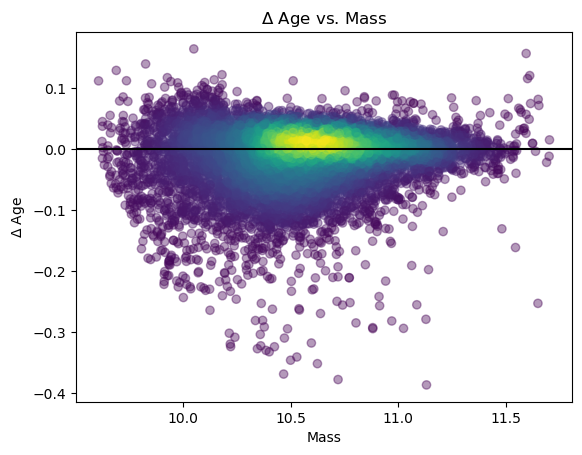

In [9]:
# remove outliers
mask = (dAge < 8)
mass = mass[mask]
dAge = dAge[mask]

x = mass
y = dAge

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, alpha = 0.4, c = z)
plt.axhline(color="black")
plt.title('$\Delta$ Age vs. Mass')
plt.xlabel("Mass")
plt.ylabel("$\Delta$ Age")

#### Try plotting delta age vs. distance to filament 

Text(0, 0.5, '$\\Delta$ Age')

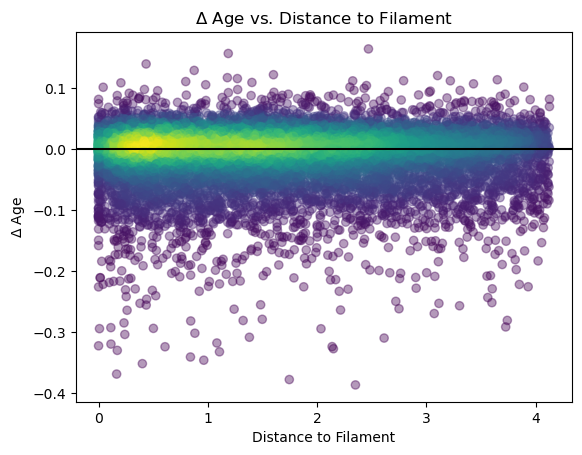

In [19]:
d = df['d']
x = d[mask]
y = dAge

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, alpha = 0.4, c = z)
plt.axhline(color="black")
plt.title('$\Delta$ Age vs. Distance to Filament')
plt.xlabel("Distance to Filament")
plt.ylabel("$\Delta$ Age")

In [55]:
errbars

array([ 9.59969625,  9.75032875,  9.90096125, 10.05159375, 10.20222625,
       10.35285875, 10.50349125, 10.65412375, 10.80475625, 10.95538875,
       11.10602125, 11.25665375, 11.40728625, 11.55791875, 11.70855125,
       11.85918375])

#### Find residual (delta age / stds.) -- WORK IN PROGRESS

In [78]:

# initialize zero array
residuals = np.zeros(len(bin_medians))
R = []
i = 0
while i < (len(mass)):
    mass_i = mass[i]
    for n in range(15):    # 1 - number of bins 
        if mass_i <= errbars[n] and mass_i >= errbars[n-1]:
           Y = dAge[i]
           residuals[i] = Y 
           
     # this gives 1d array of all expected y values
        else:
            pass
    i+=1                

residuals


IndexError: index 15 is out of bounds for axis 0 with size 15

In [106]:
def Residuals(x,y):

    Res = np.zeros(len(y))   # initialize zero array 
    i = 0
    while i < (len(x)):
        xi = x[i]
        for n in range(15):       # number of bins 
            if xi <= errbars[n] and xi >= errbars[n-1]:
                Y = y[i]
                std = np.std(Y)
                Res[i] = std
                
            else:
                pass
        i+=1
    return Res

Residuals(mass,dAge)

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
np.std(dAge)

0.05146840150276316

In [49]:
mass

array([10.5763, 10.3639, 10.8563, ..., 10.2161, 10.5102, 10.3065])

In [51]:
dAge

array([ 0.0215908 , -0.04044754, -0.03102762, ...,  0.01002077,
        0.02747097,  0.01727659])